# Actividades realizadas durante el día.

Se realizan gráficos de la cantidad de personas participando en distintas actividades a lo largo del día. Los días se clasifican en cuatro categorías, según dos criterios:
- Día laboral (lunes-viernes) o fin de semana (sábado-domingo)
- Temporada normal o estival (meses de vacaciones).  

Los datos fueron obtenidos de la Encuesta Origen-Destino (`EOD2012-Santiago.db` en la carpeta `data`), y trabajados con Matlab.

Tanto la metodología como la forma de presentar los gráficos están inspirados en el trabajo de Munizaga et. al.: _Generating twins to build weekly time use data from multiple single day OD surveys_.

## Requerimientos
Se importan librerías útiles para trabajar con los datos y graficar.

In [1]:
import scipy.io as sio # para leer archivos .mat
import pandas as pd # trabajar con DataFrames
import numpy as np # manejo de arrays
import datetime as dt # manejar los formatos de tiempos
import seaborn as sb # estilo del grafico
sb.set(style="whitegrid")
from matplotlib import pyplot as plt # librería principal de gráficos

## Importar datos y trabajo previo
Se importan los datos obtenidos con Matlab.

In [3]:
act = sio.loadmat('../../results/actividades.mat')
actividades = act['M']
grilla_temporal = act['grilla_temporal'][0]
ambientes_bruto = act['ambientes']

Se separan los datos en cuatro categorías, según tipo de día y temporada.

In [4]:
laboral_normal = actividades[:,:,0]
fin_semana_normal = actividades[:,:,1]
laboral_estival = actividades[:,:,2]
fin_semana_estival = actividades[:,:,3]

Algunas funciones para transformar los datos y graficarlos.

In [5]:
N = np.shape(laboral_normal)[1] # columnas

def convert_decimal_to_time(decimal):
    """
    Input:
    - decimal: float, en [0,1)
    representa una fraccion de un dia
    ------------------------------
    Output:
    - time: time
    cantidad de horas y minutos
    """
    x = decimal * 24
    horas = int(x)
    minutos = int(60*(x - horas))
    time = dt.time(horas, minutos)
    return time

def format_time(time):
    """Recibe una hora en formato time y retorna un string de esa hora"""
    return "{:02d}".format(time.hour) + ":{:02d}".format(time.minute)

def create_date_labels(grilla):
    """Recibe una grilla con una discretización de una dia.
    Retorna una lista del mismo largo con los nombres en formato string."""
    times = [convert_decimal_to_time(x) for x in grilla]
    labels = [format_time(t) for t in times]
    return labels

def obtener_ambientes(bruto):
    ambientes = []
    for k in range(13):
        ambientes.append(bruto[0][k][0])
    return ambientes

In [6]:
labels = create_date_labels(grilla_temporal)
ambientes = obtener_ambientes(ambientes_bruto)

Se crean DataFrames para cada categoría.

In [7]:
DF_laboral_normal = pd.DataFrame(np.transpose(laboral_normal), labels, columns= ambientes)
DF_laboral_estival = pd.DataFrame(np.transpose(laboral_estival), labels, columns=ambientes)
DF_fin_semana_normal = pd.DataFrame(np.transpose(fin_semana_normal), labels, columns= ambientes)
DF_fin_semana_estival = pd.DataFrame(np.transpose(fin_semana_estival), labels, columns=ambientes)

## Gráficos de patrones de actividad

Usando el DataFrame es posible generar un gráfico. Se escribe una función para mejorar la apariencia de este gráfico.


In [8]:
def ajustar_plot(tipo_dia_title, tipo_dia_filename):
    plt.xlabel('Hora del día')
    plt.ylabel('Cantidad de personas')
    plt.xticks(rotation=90)
    plt.title('Patrón de actividad, ' + tipo_dia_title)
    plt.legend(bbox_to_anchor=(1.02, 1))
    #plt.savefig('patron_actividad/actividades_' + tipo_dia_filename + '.pdf', bbox_inches='tight')


### Día laboral en temporada normal

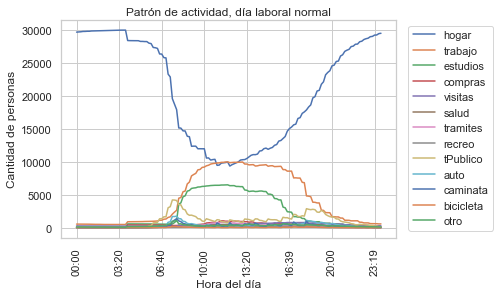

In [9]:
DF_laboral_normal.plot()
ajustar_plot('día laboral normal', 'laboral_normal')

### Fin de semana en temporada normal

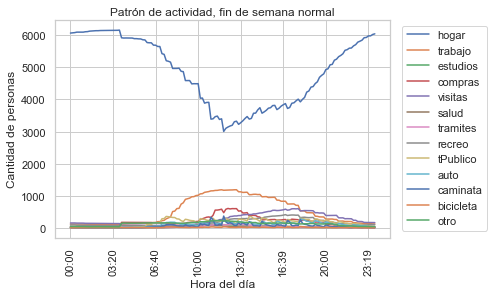

In [10]:
DF_fin_semana_normal.plot()
ajustar_plot('fin de semana normal', 'finde_normal')


### Día laboral en temporada estival

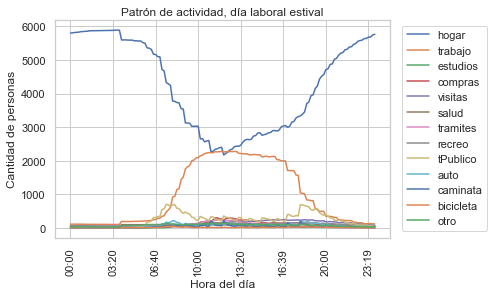

In [11]:
DF_laboral_estival.plot()
ajustar_plot('día laboral estival', 'laboral_estival')

### Fin de semana en temporada estival

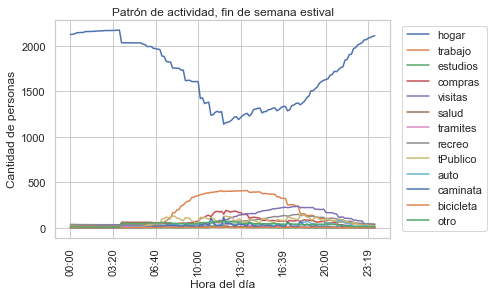

In [12]:
DF_fin_semana_estival.plot()
ajustar_plot('fin de semana estival', 'finde_estival')

### Día laboral 
Sin separar por temporada

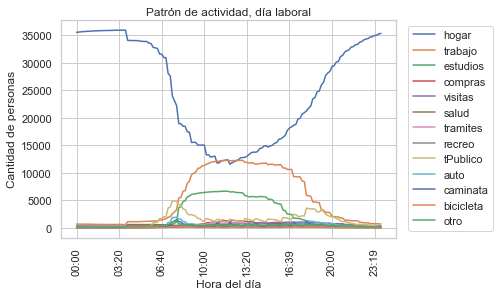

In [13]:
DF_laboral = DF_laboral_estival + DF_laboral_normal
DF_laboral.plot()
ajustar_plot('día laboral', 'laboral')

### Fin de semana 
Sin separar por temporada

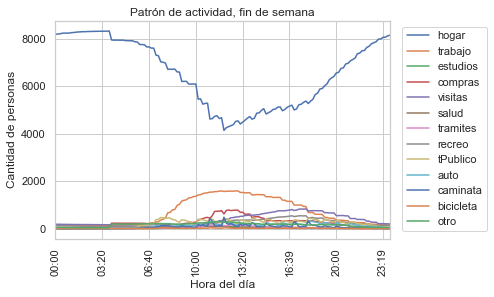

In [33]:
DF_finde = DF_fin_semana_estival + DF_fin_semana_normal
DF_finde.plot()
ajustar_plot('fin de semana', 'finde')